In [29]:
#Examine the Stanford Open Policing Project dataset and analyze the impact of gender on police behavior

In [1]:
# Import the pandas library as pd
import pandas as pd

In [7]:
# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv('RI-clean.csv', nrows=50000, low_memory=False)

In [8]:
# Examine the head of the DataFrame
ri.head()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,RI,2005-01-02,01:55,Zone K1,NaN,NaN,NaN,600,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,RI,2005-01-02,20:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2,RI-2005-00003,RI,2005-01-04,11:30,Zone X1,NaN,NaN,NaN,000,NaN,...,False,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone X1
3,RI-2005-00004,RI,2005-01-04,12:55,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,RI-2005-00005,RI,2005-01-06,01:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4


In [9]:
# Count the number of missing values in each column
print(ri.isnull().sum())

id                           0
state                        0
stop_date                    0
stop_time                    0
location_raw                 0
county_name              50000
county_fips              50000
fine_grained_location    50000
police_department            0
driver_gender             1990
driver_age_raw            1971
driver_age                2208
driver_race_raw           1988
driver_race               1988
violation_raw             1988
violation                 1988
search_conducted             0
search_type_raw          47988
search_type              47988
contraband_found             0
stop_outcome              1988
is_arrested               1988
stop_duration             1988
out_of_state              2203
drugs_related_stop           0
district                     0
dtype: int64


In [10]:
# Examine the shape of the DataFrame
print(ri.shape)

(50000, 26)


In [ ]:
# Dropping the unnecessary columns

In [11]:

# Drop the 'county_name' and 'state' columns
ri.drop(['county_name', 'state'], axis='columns', inplace=True)

In [12]:
# Examine the shape of the DataFrame (again)
print(ri.shape)

(50000, 24)


In [13]:
# Dropping rows

In [14]:
# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)

In [15]:
# Count the number of missing values in each column (again)
print(ri.isnull().sum())

id                           0
stop_date                    0
stop_time                    0
location_raw                 0
county_fips              48010
fine_grained_location    48010
police_department            0
driver_gender                0
driver_age_raw               0
driver_age                 232
driver_race_raw              0
driver_race                  0
violation_raw                0
violation                    0
search_conducted             0
search_type_raw          45998
search_type              45998
contraband_found             0
stop_outcome                 0
is_arrested                  0
stop_duration                0
out_of_state               215
drugs_related_stop           0
district                     0
dtype: int64


In [16]:
# Examine the shape of the DataFrame
print(ri.shape)


(48010, 24)


In [17]:
# Fixing a data type

In [18]:
# Examine the head of the 'is_arrested' column
print(ri.is_arrested.head())

0    False
1    False
3    False
4    False
5    False
Name: is_arrested, dtype: object


In [19]:
# Check the data type of 'is_arrested'
print(ri.is_arrested.dtype)

object


In [20]:

# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype('bool')

In [21]:
# Check the data type of 'is_arrested' (again)
print(ri.is_arrested.dtype)

bool


In [22]:
# Combining object columns

In [23]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')

In [24]:
# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

In [25]:
# Examine the data types of the DataFrame
print(ri.dtypes)


id                               object
stop_date                        object
stop_time                        object
location_raw                     object
county_fips                     float64
fine_grained_location           float64
police_department                object
driver_gender                    object
driver_age_raw                  float64
driver_age                      float64
driver_race_raw                  object
driver_race                      object
violation_raw                    object
violation                        object
search_conducted                   bool
search_type_raw                  object
search_type                      object
contraband_found                   bool
stop_outcome                     object
is_arrested                        bool
stop_duration                    object
out_of_state                     object
drugs_related_stop                 bool
district                         object
stop_datetime            datetime64[ns]


In [26]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

In [27]:
# Examine the index
print(ri.index)

DatetimeIndex(['2005-01-02 01:55:00', '2005-01-02 20:30:00',
               '2005-01-04 12:55:00', '2005-01-06 01:30:00',
               '2005-01-12 08:05:00', '2005-01-18 08:15:00',
               '2005-01-18 17:13:00', '2005-01-23 23:15:00',
               '2005-01-24 20:32:00', '2005-02-09 03:05:00',
               ...
               '2006-08-08 22:22:00', '2006-08-08 22:25:00',
               '2006-08-08 22:30:00', '2006-08-08 22:30:00',
               '2006-08-08 22:45:00', '2006-08-08 22:45:00',
               '2006-08-08 22:45:00', '2006-08-08 22:53:00',
               '2006-08-08 23:00:00', '2006-08-08 23:00:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=48010, freq=None)


In [28]:

# Examine the columns
print(ri.columns)

Index(['id', 'stop_date', 'stop_time', 'location_raw', 'county_fips',
       'fine_grained_location', 'police_department', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race_raw', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type_raw',
       'search_type', 'contraband_found', 'stop_outcome', 'is_arrested',
       'stop_duration', 'out_of_state', 'drugs_related_stop', 'district'],
      dtype='object')


In [30]:
"""
Does the gender of a driver have an impact on police behavior during a traffic stop? 
In this chapter, we will explore that question while practicing filtering, grouping, method chaining, 
Boolean math, string methods, and more!
"""

'\nDoes the gender of a driver have an impact on police behavior during a traffic stop? \nIn this chapter, you will explore that question while practicing filtering, grouping, method chaining, \nBoolean math, string methods, and more!\n'

In [31]:
ri = pd.read_csv('RI-clean.csv', nrows=50000, low_memory=False)

ri.drop(['county_name', 'state'], axis='columns', inplace=True)
ri.dropna(subset=['driver_gender'], inplace=True)

ri['is_arrested'] = ri.is_arrested.astype('bool')

combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)

ri.set_index('stop_datetime', inplace=True)

In [32]:
# Count the unique values in 'violation'
print(ri.violation.value_counts())

Speeding               36111
Moving violation        6522
Equipment               3022
Registration/plates     1463
Other                    892
Name: violation, dtype: int64


In [33]:
# Express the counts as proportions
print(ri.violation.value_counts(normalize=True))

Speeding               0.752156
Moving violation       0.135847
Equipment              0.062945
Registration/plates    0.030473
Other                  0.018579
Name: violation, dtype: float64


In [34]:
# Comparing violations by gender

In [35]:
# Create a DataFrame of female drivers
female = ri[ri.driver_gender=='F']

# Create a DataFrame of male drivers
male = ri[ri.driver_gender=='M']

In [36]:
# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize=True))

Speeding               0.811180
Moving violation       0.099031
Equipment              0.045608
Registration/plates    0.027575
Other                  0.016605
Name: violation, dtype: float64


In [37]:
# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize=True))

Speeding               0.729518
Moving violation       0.149967
Equipment              0.069595
Registration/plates    0.031584
Other                  0.019337
Name: violation, dtype: float64


In [38]:
# Comparing speeding outcomes by gender

In [39]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender=='F') & (ri.violation=='Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender=='M') & (ri.violation=='Speeding')]

In [40]:
# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True))

# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.973416
Warning             0.012968
Arrest Driver       0.007410
N/D                 0.003612
Arrest Passenger    0.002316
No Action           0.000278
Name: stop_outcome, dtype: float64
Citation            0.957298
Arrest Driver       0.026230
Warning             0.010666
N/D                 0.003397
Arrest Passenger    0.002015
No Action           0.000395
Name: stop_outcome, dtype: float64


In [41]:
# Calculating the search rate

In [42]:
# Check the data type of 'search_conducted'
print(ri.search_conducted.dtype)

bool


In [43]:
# Calculate the search rate by counting the values
print(ri.search_conducted.value_counts(normalize=True))

False    0.958092
True     0.041908
Name: search_conducted, dtype: float64


In [44]:
# Calculate the search rate by taking the mean
print(ri.search_conducted.mean())

0.04190793584669861


In [45]:
# Comparing search rates by gender

In [46]:
# Calculate the search rate for female drivers
print(ri[ri.driver_gender=='F'].search_conducted.mean())


0.017807498685100308


In [47]:
# Calculate the search rate for male drivers
print(ri[ri.driver_gender=='M'].search_conducted.mean())

0.05115126365234431


In [48]:

# Calculate the search rate for both groups simultaneously
print(ri.groupby('driver_gender').search_conducted.mean())

driver_gender
F    0.017807
M    0.051151
Name: search_conducted, dtype: float64


In [49]:
# Adding a second factor to the analysis

In [50]:

# Calculate the search rate for each combination of gender and violation
print(ri.groupby(['driver_gender', 'violation']).search_conducted.mean())

driver_gender  violation          
F              Equipment              0.079077
               Moving violation       0.047800
               Other                  0.045249
               Registration/plates    0.114441
               Speeding               0.006854
M              Equipment              0.123395
               Moving violation       0.088778
               Other                  0.154993
               Registration/plates    0.171533
               Speeding               0.028560
Name: search_conducted, dtype: float64


In [51]:
# Reverse the ordering to group by violation before gender
print(ri.groupby(['violation', 'driver_gender']).search_conducted.mean())

violation            driver_gender
Equipment            F                0.079077
                     M                0.123395
Moving violation     F                0.047800
                     M                0.088778
Other                F                0.045249
                     M                0.154993
Registration/plates  F                0.114441
                     M                0.171533
Speeding             F                0.006854
                     M                0.028560
Name: search_conducted, dtype: float64


In [52]:
# Counting protective frisks
# Count the 'search_type' values
print(ri.search_type.value_counts())


Incident to Arrest                                          958
Probable Cause                                              244
Protective Frisk                                            204
Inventory                                                   117
Incident to Arrest,Inventory                                116
Incident to Arrest,Probable Cause                            76
Incident to Arrest,Protective Frisk                          63
Reasonable Suspicion                                         43
Probable Cause,Protective Frisk                              36
Incident to Arrest,Inventory,Protective Frisk                33
Inventory,Protective Frisk                                   23
Incident to Arrest,Probable Cause,Protective Frisk           20
Incident to Arrest,Inventory,Probable Cause                  19
Protective Frisk,Reasonable Suspicion                        16
Inventory,Probable Cause                                     16
Probable Cause,Reasonable Suspicion     

In [53]:
# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

In [54]:

# Check the data type of 'frisk'
print(ri.frisk.dtype)

bool


In [56]:

# Take the sum of 'frisk'
print(ri.frisk.sum())

403


In [57]:
# Comparing frisk rates by gender

In [58]:
# Comparing frisk rates by gender

In [59]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted]

In [60]:
# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

0.20029821073558648


In [61]:
# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())

driver_gender
F    0.164557
M    0.205070
Name: frisk, dtype: float64


In [62]:
###

In [63]:
# Visual exploratory data analysis



In [64]:
ri = pd.read_csv('RI-clean.csv', nrows=50000, low_memory=False)

ri.drop(['county_name', 'state'], axis='columns', inplace=True)
ri.dropna(subset=['driver_gender'], inplace=True)

ri['is_arrested'] = ri.is_arrested.astype('bool')

combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)

ri.set_index('stop_datetime', inplace=True)

In [65]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())

0.05182253697146428


In [66]:
# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

stop_datetime
0     0.091657
1     0.113384
2     0.113103
3     0.084877
4     0.065217
5     0.037975
6     0.020573
7     0.022004
8     0.023802
9     0.031267
10    0.033094
11    0.026150
12    0.046575
13    0.035284
14    0.034194
15    0.046850
16    0.044487
17    0.054431
18    0.049796
19    0.059952
20    0.060850
21    0.115991
22    0.073970
23    0.066730
Name: is_arrested, dtype: float64


In [67]:
# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()


In [70]:
# Plotting the hourly arrest rate
import matplotlib.pyplot as plt


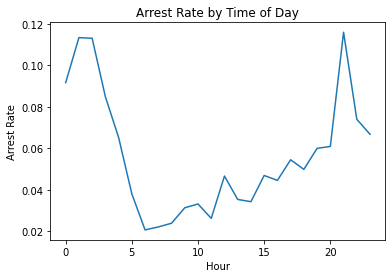

In [71]:
# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

In [72]:
# Plotting drug-related stops

In [73]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

stop_datetime
2005-12-31    0.008038
2006-12-31    0.006257
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


In [74]:
# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

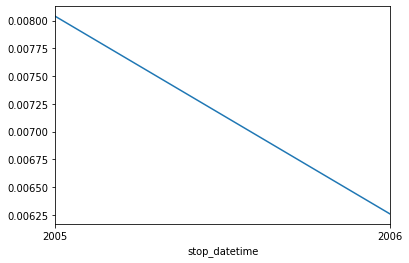

In [75]:
# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

In [76]:
# Comparing drug and search rates

In [77]:
# Calculate and save the annual search rate
#annual_search_rate = ri.search_conducted.resample('A').mean()
annual_search_rate = ri.search_conducted.dropna().astype('int').resample('A').mean()

In [78]:
# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

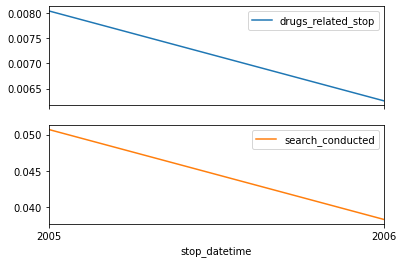

In [79]:

# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

In [80]:
# Tallying violations by district

In [81]:
# Create a frequency table of districts and violations
print(pd.crosstab(ri.district, ri.violation))

violation  Equipment  Moving violation  Other  Registration/plates  Speeding
district                                                                    
Zone K1          276               517     69                   52      5895
Zone K2          422              1220    156                  256      7653
Zone K3         1083              1181    247                  435     10608
Zone X1           93               643     44                    9      1128
Zone X3          342               741    127                  102      4148
Zone X4          806              2220    249                  609      6679


In [82]:
# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)

In [83]:
# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

violation  Equipment  Moving violation  Other  Registration/plates  Speeding
district                                                                    
Zone K1          276               517     69                   52      5895
Zone K2          422              1220    156                  256      7653
Zone K3         1083              1181    247                  435     10608


In [84]:
# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

In [85]:
# Plotting violations by district

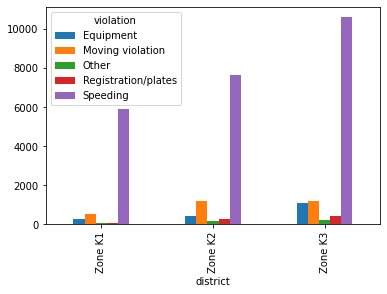

In [86]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# Display the plot
plt.show()

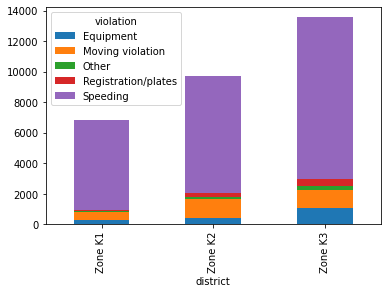

In [87]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True)

# Display the plot
plt.show()